In [22]:
import numpy as np
import os
import matplotlib
%matplotlib inline

In [23]:
# load own package
os.chdir("/Users/jantiegges/Google Drive/Uni/1. Semester/Machine Intelligence I/Machine-Intelligence-I/ML_ressources")

from plot import plot_data, scatter_set, plot_heatmaps

In [24]:
# load data
os.chdir("/Users/jantiegges/Google Drive/Uni/1. Semester/Machine Intelligence I/Machine-Intelligence-I/Exercise 5")

### The data

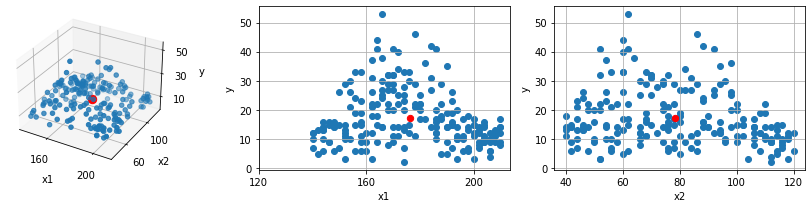

In [25]:
# Array of 200 observations {x_n, y_n} with x_n = [x_n_1, x_n_2]
train_data = np.loadtxt('TrainingRidge.csv', skiprows=1, dtype=bytes, delimiter=',').astype(np.float64)

# Array of 1476 combinations for [x_n_1, x_n_2] (36 x 41 grid) in same format
val_data = np.loadtxt('ValidationRidge.csv', skiprows=1, dtype=bytes, delimiter=',').astype(np.float64)

plot_data(train_data)

In [26]:
# split train data
X_train = train_data[0:, :2]
y_train = train_data[0:, -1]

X_val = val_data[0:, :2]
y_val = val_data[0:, -1]

## a) Sphering/Whitening

In [84]:
def sphering(X, X_val):
    
    # Center data
    X_centered = X - np.mean(X, axis=0)
    X_centered = X_centered.T

    # Calculating the covariance matrix
    X_cov = np.cov(X_centered, rowvar=True)
    #X_cov = X_centered.dot(X_centered.T) / X_centered.shape[0]

    # Using np.linalg.eig function
    w, v = np.linalg.eigh(X_cov)
    
    # Calculate inverse square root of Eigenvalues
    diagw = np.diag(np.nan_to_num(1 / np.sqrt(w)))

    # Sphering training data
    Xt_sphered = diagw.dot(v.T).dot(X_centered)

    # sphering val data
    Xv_sphered = diagw.dot(v.T).dot((X_val - np.mean(X, axis=0)).T)

    return Xt_sphered, Xv_sphered

In [85]:
Xt_sphered, Xv_sphered = sphering(X_train, X_val)
Xt_sphered = Xt_sphered.T
Xv_sphered = Xv_sphered.T

print(f"Train data mean: {np.mean(Xt_sphered).round(3)}")
print(f"Train data variance: {np.var(Xt_sphered).round(3)}")

print(f"Validation data mean: {np.mean(Xv_sphered).round(3)}")
print(f"Validation data variance: {np.var(Xv_sphered).round(3)}")

Train data mean: 0.0
Train data variance: 0.995
Validation data mean: 0.066
Validation data variance: 1.061


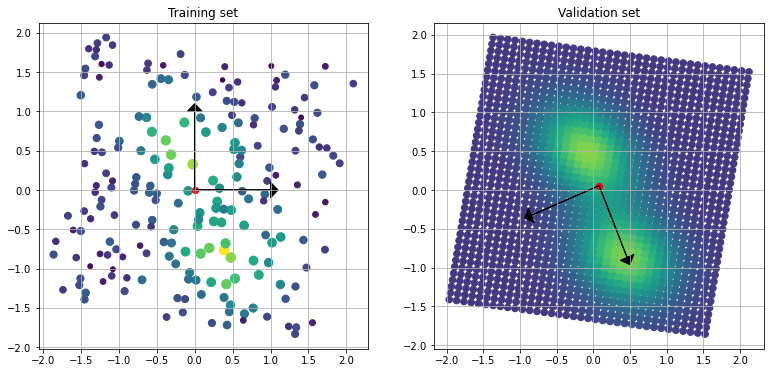

In [86]:
# concatenate data to one array
tdata_white = np.c_[Xt_sphered, y_train]
vdata_white = np.c_[Xv_sphered, y_val]
scatter_set(tdata_white, vdata_white, titles=['Training set', 'Validation set'], fsize=(13, 6))

## b) Feature Expansion

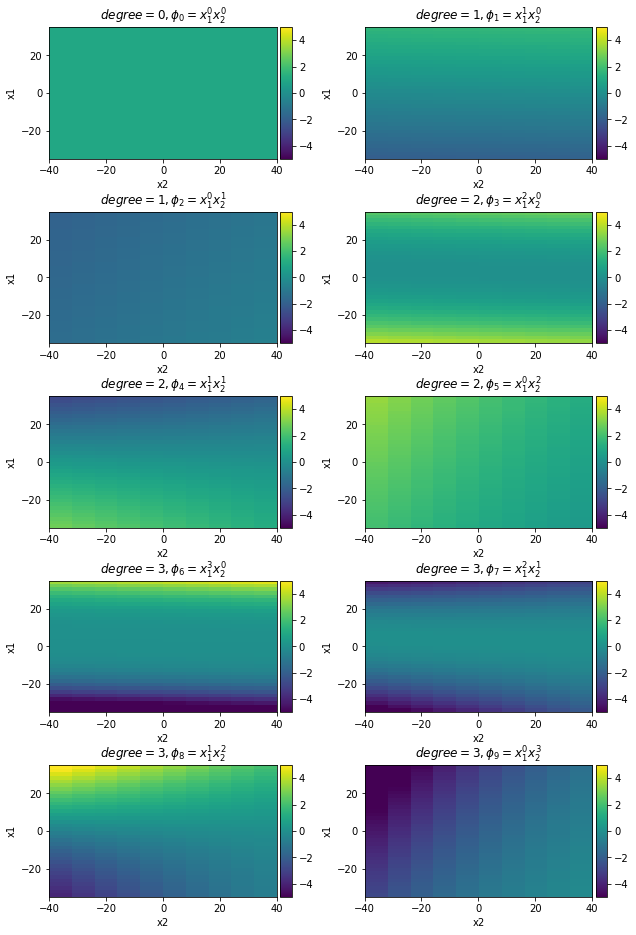

In [87]:
# Exercise b
def monomial_matrix(data):

    def monomials(x1, x2, max_degree):
        for degree in range(max_degree + 1):
            for i in range(degree + 1):
                # yield will return a generator (won't store data)
                yield x1**(degree - i) * x2**i

    # create array with monomial for each input
    matrix = np.array([[x1, x2, monomials(x1, x2, 9), y] for x1, x2, y in data])
    matrix = np.array([list(x) for x in matrix[:, 2]])
    return matrix

validation_monomial = monomial_matrix(vdata_white)
training_monomial = monomial_matrix(tdata_white).T
plot_heatmaps(validation_monomial.T.reshape(55, 41, 36))